In [40]:
import numpy as np 
import pandas as pd
from pomegranate import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import pygraphviz as pgv
import json
np.random.seed(1)

In [2]:
df = pd.read_csv("/Users/anubhavrana/Downloads/kr-vs-kp.data", header=None)

In [3]:
(df.shape[0] - 2500) / df.shape[0]

0.21777221526908636

In [26]:
df.iloc[:, -1]

0         won
1         won
2         won
3         won
4         won
5         won
6         won
7         won
8         won
9         won
10        won
11        won
12        won
13        won
14        won
15        won
16        won
17        won
18        won
19        won
20        won
21        won
22        won
23        won
24        won
25        won
26        won
27        won
28        won
29        won
        ...  
3166    nowin
3167    nowin
3168    nowin
3169    nowin
3170    nowin
3171    nowin
3172    nowin
3173    nowin
3174    nowin
3175    nowin
3176    nowin
3177    nowin
3178    nowin
3179    nowin
3180    nowin
3181    nowin
3182    nowin
3183    nowin
3184    nowin
3185    nowin
3186    nowin
3187    nowin
3188    nowin
3189    nowin
3190    nowin
3191    nowin
3192    nowin
3193    nowin
3194    nowin
3195    nowin
Name: 36, Length: 3196, dtype: object

# Chow-Liu

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2)

In [198]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [40]:
#for col in df.columns:
    #print(col, df[col].unique())

In [41]:
count = np.array([df[col].unique().shape[0] for col in df.columns])

In [200]:
model = BayesianNetwork()

In [30]:
X_train.shape, y_train.shape

((2556, 36), (2556,))

In [6]:
Train = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
Train.shape

(2556, 37)

In [7]:
Test = np.concatenate((X_test, np.array([None]*X_test.shape[0]).reshape(-1, 1)), axis=1)
Test.shape

(640, 37)

In [201]:
tree = model.from_samples(Train, algorithm='chow-liu', root=36)

In [202]:
probs = tree.predict_proba(Test)

In [206]:
probs[0][-1]

{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "won" :0.31750669831668216,
            "nowin" :0.6824933016833178
        }
    ],
    "frozen" :false
}

In [207]:
predic_probs = np.array([p[-1].values()[0] for p in probs])

In [208]:
y_t = y_test == 'won'

In [209]:
preds = predic_probs >= 0.5

In [210]:
np.mean(preds == y_t)

0.9203125

In [211]:
confusion_matrix(y_t, preds)

array([[264,  44],
       [  7, 325]])

In [18]:
json.loads(json_tree)

{'class': 'BayesianNetwork',
 'name': '112088394336',
 'structure': [[10],
  [17],
  [33],
  [33],
  [6],
  [31],
  [1],
  [6],
  [7],
  [21],
  [35],
  [4],
  [30],
  [0],
  [10],
  [1],
  [22],
  [12],
  [30],
  [30],
  [36],
  [8],
  [4],
  [2],
  [34],
  [10],
  [32],
  [29],
  [31],
  [26],
  [10],
  [34],
  [36],
  [17],
  [25],
  [],
  [9]],
 'states': [{'class': 'State',
   'distribution': {'class': 'Distribution',
    'name': 'ConditionalProbabilityTable',
    'table': [['f', 'f', '0.9781121751025992'],
     ['f', 't', '0.021887824897400817'],
     ['t', 'f', '0.7641681901279708'],
     ['t', 't', '0.23583180987202929']],
    'dtypes': ['str', 'str', 'float'],
    'parents': [{'class': 'Distribution',
      'name': 'ConditionalProbabilityTable',
      'table': [['n', 't', '0.570088587806149'],
       ['n', 'f', '0.429911412193851'],
       ['t', 't', '0.0'],
       ['t', 'f', '1.0']],
      'dtypes': ['str', 'str', 'float'],
      'parents': [{'class': 'Distribution',
        

In [212]:
filename = 'graph2.png'
G = pgv.AGraph(directed=True, size=(15, 15))
G.layout()
for state in tree.states:
    G.add_node(state.name, color='red')

for parent, child in tree.edges:
    G.add_edge(parent.name, child.name)

if filename is None:
    with tempfile.NamedTemporaryFile() as tf:
        G.draw(tf.name, format='png', prog='dot')
        img = matplotlib.image.imread(tf.name)
        plt.imshow(img)
        plt.axis('off')
else:
    G.draw(filename, prog='dot')

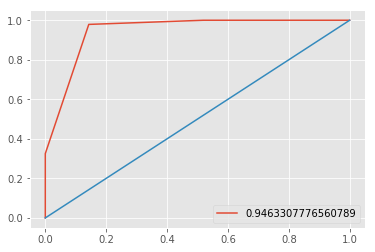

In [213]:
fig, ax = plt.subplots()
plt.style.use("ggplot")

fpr, tpr, thr = roc_curve(y_t.reshape(-1, 1), predic_probs.reshape(-1, 1), )
ax.plot(fpr, tpr, label=roc_auc_score(y_t.reshape(-1, 1), predic_probs.reshape(-1, 1)))
ax.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1))
ax.legend()

In [91]:
list(zip(fpr, tpr, thr))

[(0.0, 0.0, 2.0),
 (0.0, 0.3476923076923077, 1.0),
 (0.1619047619047619, 0.9692307692307692, 0.6821602631546448),
 (0.48253968253968255, 1.0, 0.3035124262176294),
 (0.7301587301587301, 1.0, 0.27058414380324797),
 (1.0, 1.0, 0.07004452253146527)]

In [103]:
def dep(X, Y):
    probs_joint = []
    probs_x = []
    probs_y = []
    for x in np.unique(X):
        for y in np.unique(Y):
            
            p = np.mean((X == x) & (Y == y))
            #print((X == x) & (Y == y), (X == x) == (Y == y))
            if p > 0:
                probs_joint.append(p)
                probs_x.append(np.mean(X == x))
                probs_y.append(np.mean(Y == y))
    #print(np.array(probs_joint))
    #print(((np.array(probs_x) * np.array(probs_y))))
    return np.sum(np.array(probs_joint) * np.log((np.array(probs_joint) / (np.array(probs_x) * np.array(probs_y)))))

In [107]:
dep(df[10].values, df[35].values)

0.16973374070463715

In [95]:
df[36].values

array(['won', 'won', 'won', ..., 'nowin', 'nowin', 'nowin'], dtype=object)

In [110]:
num_unique = df.apply(lambda x: np.unique(x).shape[0], axis=0)

In [274]:
df.columns.shape[0] - 2

35

# ETC


In [268]:

# Step 2
#Tree initialized with right [] being 'right' and same for left
T = ({'edge': (36, 0), 'left': 36, 'right': 0, 'left_tree': (), 'right_tree': ()}, dep(df[36].values, df[0].values))
E = []
ETr = {'T': T, 'E': E}
j = -1
ETr_ = ETr
step = 3
ind = np.random.randint(1, 36, df.columns.shape[0] - 2)
while j <= df.columns.shape[0] - 2:
    
    #Since some steps ask to return to either step 3 or 6
    if step == 3:
        ETr = ETr_
        j += 1
        if j >= df.columns.shape[0] - 2:
            break
    
    #Randomize feature selection at each step
    i = ind[j]
    #print(ETr_['T'][0])
    
    # Step 6
    dep_c = dep(df[ETr_['T'][0]['left']].values, df[i].values)
    dep_d = dep(df[ETr_['T'][0]['right']].values, df[i].values)
    
    #Step 7
    if dep_c < dep_d:
        
        #Step 8
        dep_a = dep(df[ETr_['T'][0]['edge'][0]].values, df[i].values)
        if ETr_['T'][1] < dep_a:
            
            #Step 9
            ETr_['E'].append(((ETr_['T'][0]['edge'][0], i), ETr_['T'][0]['edge']))
            ETr_['T'] = ({'edge': (ETr_['T'][0]['edge'][0], i), 'left': ETr_['T'][0]['left'], 'right': ETr_['T'][0]['right'], 'left_tree': (), 'right_tree': ETr_['T']},
                         dep(df[ETr_['T'][0]['edge'][0]].values, df[i].values))
            step = 3
        
        
        else:
            if len(ETr_['T'][0]['right_tree']) == 0:
                
                #Step 10
                ETr_['T'][0]['right_tree'] = ({'edge': (ETr_['T'][0]['edge'][1], i), 'left': ETr_['T'][0]['edge'][1], 'right': i, 'left_tree': (), 'right_tree': ()},
                                               dep(df[ETr_['T'][0]['edge'][1]].values, df[i].values))
                ETr_['E'].append((ETr_['T'][0]['edge'], ETr_['T'][0]['right_tree'][0]['edge']))
                
                step = 3
                
            else:
                
                #Step 11
                ETr_['T'] = ETr_['T'][0]['right_tree']
                step = 6
    
    #Step 12
    else:
        if ETr_['T'][1] < dep(df[ETr_['T'][0]['edge'][1]].values, df[i].values):
            
            #Step 13
            
            ETr_['E'].append(((i, ETr_['T'][0]['edge'][1]), ETr_['T'][0]['edge']))
            ETr_['T'] = ({'edge': (i, ETr_['T'][0]['edge'][1]), 'left': ETr_['T'][0]['left'], 'right': ETr_['T'][0]['right'],  'left_tree': ETr_['T'], 'right_tree': ()},
                         dep(df[i].values, df[ETr_['T'][0]['edge'][1]].values))
            step = 3
            
            
        else:
            if len(ETr_['T'][0]['left_tree']) == 0:
                
                #Step 14
                
                ETr_['T'][0]['left_tree'] = ({'edge': (i, ETr_['T'][0]['edge'][0],), 'left': i, 'right': ETr_['T'][0]['edge'][0], 'left_tree': (), 'right_tree': ()},
                                               dep(df[i].values, df[ETr_['T'][0]['edge'][0]].values))
                ETr_['E'].append((ETr_['T'][0]['edge'], ETr_['T'][0]['left_tree'][0]['edge']))
                step = 3
                
            else:
                
                #Step 15
                
                ETr_['T'] = ETr_['T'][0]['left_tree']
                step = 6
                        
                
            
            
print(ETr)          
            

{'T': ({'edge': (20, 20), 'left': 20, 'right': 20, 'left_tree': ({'edge': (16, 20), 'left': 16, 'right': 20, 'left_tree': (), 'right_tree': ()}, 0.0007602841611247719), 'right_tree': ()}, 0.4755055863333253), 'E': [((15, 0), (36, 0)), ((15, 14), (15, 0)), ((22, 14), (15, 14)), ((22, 14), (14, 13)), ((14, 13), (27, 14)), ((27, 14), (14, 19)), ((14, 19), (13, 14)), ((13, 14), (14, 26)), ((2, 14), (13, 14)), ((13, 14), (1, 13)), ((14, 26), (26, 16)), ((26, 16), (29, 26)), ((26, 16), (16, 7)), ((26, 33), (26, 16)), ((26, 33), (27, 26)), ((21, 33), (26, 33)), ((2, 33), (21, 33)), ((2, 33), (33, 17)), ((27, 26), (26, 26)), ((20, 26), (27, 26)), ((20, 31), (20, 26)), ((20, 1), (20, 31)), ((20, 22), (20, 31)), ((20, 34), (20, 31)), ((20, 2), (20, 31)), ((20, 26), (26, 26)), ((20, 13), (20, 26)), ((20, 19), (20, 13)), ((20, 14), (20, 19)), ((20, 14), (20, 19)), ((20, 25), (20, 19)), ((20, 25), (27, 20)), ((27, 20), (20, 20)), ((27, 35), (27, 20)), ((20, 20), (16, 20))]}


In [269]:
ETr['E']

[((15, 0), (36, 0)),
 ((15, 14), (15, 0)),
 ((22, 14), (15, 14)),
 ((22, 14), (14, 13)),
 ((14, 13), (27, 14)),
 ((27, 14), (14, 19)),
 ((14, 19), (13, 14)),
 ((13, 14), (14, 26)),
 ((2, 14), (13, 14)),
 ((13, 14), (1, 13)),
 ((14, 26), (26, 16)),
 ((26, 16), (29, 26)),
 ((26, 16), (16, 7)),
 ((26, 33), (26, 16)),
 ((26, 33), (27, 26)),
 ((21, 33), (26, 33)),
 ((2, 33), (21, 33)),
 ((2, 33), (33, 17)),
 ((27, 26), (26, 26)),
 ((20, 26), (27, 26)),
 ((20, 31), (20, 26)),
 ((20, 1), (20, 31)),
 ((20, 22), (20, 31)),
 ((20, 34), (20, 31)),
 ((20, 2), (20, 31)),
 ((20, 26), (26, 26)),
 ((20, 13), (20, 26)),
 ((20, 19), (20, 13)),
 ((20, 14), (20, 19)),
 ((20, 14), (20, 19)),
 ((20, 25), (20, 19)),
 ((20, 25), (27, 20)),
 ((27, 20), (20, 20)),
 ((27, 35), (27, 20)),
 ((20, 20), (16, 20))]

In [270]:
edge_set = [t for i in ETr['E'] for t in i]


In [271]:
node_set = set([n for t in edge_set for n in t])
node_set

{0,
 1,
 2,
 7,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 29,
 31,
 33,
 34,
 35,
 36}

In [272]:
filename = 'graph_ETC.png'
G = pgv.AGraph(directed=True, size=(15, 15))
G.layout()
for state in set(edge_set):
    G.add_node(state, color='red')

for parent, child in ETr_['E']:
    G.add_edge(parent, child)

if filename is None:
    with tempfile.NamedTemporaryFile() as tf:
        G.draw(tf.name, format='png', prog='dot')
        img = matplotlib.image.imread(tf.name)
        plt.imshow(img)
        plt.axis('off')
else:
    G.draw(filename, prog='dot')

In [273]:
filename = 'graph_ETC_BN.png'
plt.style.use("ggplot")
G = pgv.AGraph(directed=True, size=(15, 15))
G.layout()
for state in node_set:
    G.add_node(state, color='red')

for parent, child in edge_set:
    G.add_edge(parent, child)

if filename is None:
    with tempfile.NamedTemporaryFile() as tf:
        G.draw(tf.name, format='png', prog='dot')
        img = matplotlib.image.imread(tf.name)
        plt.imshow(img)
        plt.axis('off')
else:
    G.draw(filename, prog='dot')

In [114]:
df.columns.shape[0]

37

In [68]:


df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


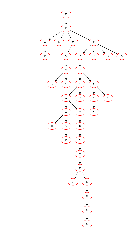

In [99]:
tree.plot()

In [56]:
y_hat = tree.predict(Test)

In [57]:
Test

array([['f', 't', 'f', ..., 'f', 'n', None],
       ['t', 'f', 'f', ..., 'f', 'n', None],
       ['f', 'f', 'f', ..., 'f', 'n', None],
       ...,
       ['f', 'f', 'f', ..., 't', 'n', None],
       ['f', 'f', 'f', ..., 't', 't', None],
       ['f', 'f', 'f', ..., 't', 'n', None]], dtype=object)

In [50]:
model = BN.ParentGraph(df.values, key_count=count, parent_set=(35))


AttributeError: type object 'pomegranate.BayesianNetwork.BayesianNetwork' has no attribute 'ParentGraph'

In [53]:
%env THEANO_FLAGS=device=cpu,floatX=float32
import theano

import pymc3 as pm
from pymc3 import Normal, Metropolis, sample, MvNormal, Dirichlet, \
    DensityDist, find_MAP, NUTS, Slice
import theano.tensor as tt
from theano.tensor.nlinalg import det
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env: THEANO_FLAGS=device=cpu,floatX=float32


In [57]:
data = pd.read_csv("data2.txt", header=None).values

In [60]:
from pymc3.math import logsumexp
n_samples = data.shape[0]
# Log likelihood of normal distribution
def logp_normal(mu, tau, value):
    # log probability of individual samples
    k = tau.shape[0]
    delta = lambda mu: value - mu
    return (-1 / 2.) * (k * tt.log(2 * np.pi) + tt.log(1./det(tau)) +
                         (delta(mu).dot(tau) * delta(mu)).sum(axis=1))

# Log likelihood of Gaussian mixture distribution
def logp_gmix(mus, pi, tau):
    def logp_(value):
        logps = [tt.log(pi[i]) + logp_normal(mu, tau, value)
                 for i, mu in enumerate(mus)]

        return tt.sum(logsumexp(tt.stacklists(logps)[:, :n_samples], axis=0))

    return logp_


In [65]:
with pm.Model() as model:
    mus = [MvNormal('mu_%d' % i, mu=pm.floatX(np.zeros(2)), tau=pm.floatX(0.1 * np.eye(2)), shape=(2,))
           for i in range(2)]
    pi = Dirichlet('pi', a=pm.floatX(0.1 * np.ones(2)), shape=(2,))
    xs = DensityDist('x', logp_gmix(mus, pi, np.eye(2)), observed=data)

# with model:
#     %time approx = pm.fit(n=4500, obj_optimizer=pm.adagrad(learning_rate=1e-1))

# means = approx.bij.rmap(approx.mean.eval())
# cov = approx.cov.eval()
# sds = approx.bij.rmap(np.diag(cov)**.5)

In [62]:
means

{'mu_1': array([0.45304253, 0.44724032]),
 'mu_0': array([0.45264179, 0.45650439]),
 'pi_stickbreaking__': array([0.60103418])}

In [63]:
sds

{'mu_1': array([0.08508612, 0.07951798]),
 'mu_0': array([0.06758652, 0.06271373]),
 'pi_stickbreaking__': array([1.11104623])}

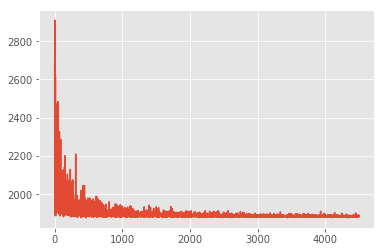

In [64]:

plt.plot(approx.hist)

In [66]:
with model:
    mean_field = pm.fit(method='advi')

INFO (theano.gof.compilelock): Refreshing lock /Users/anubhavrana/.theano/compiledir_Darwin-17.7.0-x86_64-i386-64bit-i386-3.7.1-64/lock_dir/lock
Average Loss = 1,896: 100%|██████████| 10000/10000 [00:16<00:00, 618.94it/s] 
Finished [100%]: Average Loss = 1,896


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2181e978>,
      dtype=object)

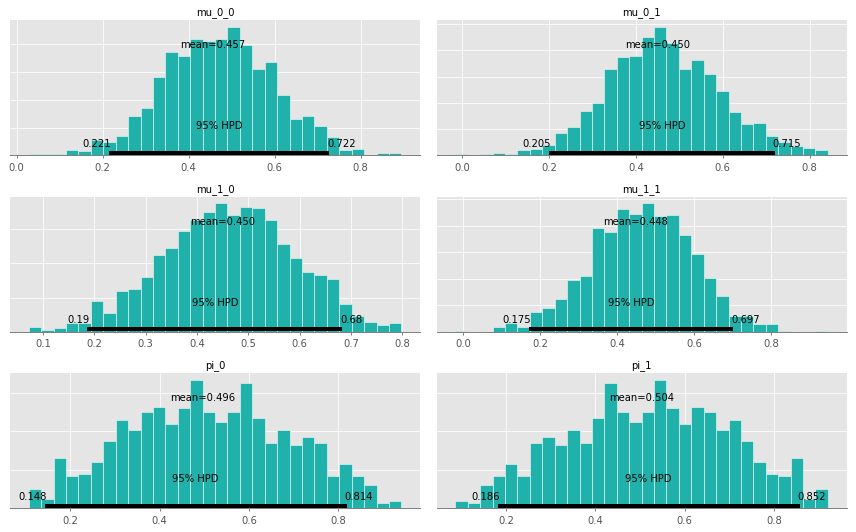

In [67]:
pm.plot_posterior(mean_field.sample(1000), color='LightSeaGreen')

In [17]:
s = 'FrozenBroccoli CarrotsRaw CeleryRaw FrozenCorn LettuceIcebergRaw PeppersSweetRaw PotatoesBaked Tofu RoastedChicken SpaghettiWSauce TomatoRedRipeRaw AppleRawWSkin Banana Grapes KiwifruitRawFresh Oranges Bagels WheatBread WhiteBread OatmealCookies ApplePie ChocolateChipCookies ButterRegular CheddarCheese WholeMilk LowfatMilk SkimMilk PoachedEggs ScrambledEggs BolognaTurkey FrankfurterBeef HamSlicedExtralean KielbasaPork CapNCrunch Cheerios CornFlks RaisinBrn RiceKrispies SpecialK Oatmeal MaltOMealChoc PizzaPepperoni Taco HamburgerToppings HotdogPlain Couscous WhiteRice MacaroniCkd PeanutButter Pork SardinesInOil WhiteTunaInWater PopcornAirPopped PotatoChipsBbqflvr Pretzels TortillaChip ChicknoodlSoup SpltPea&Hamsoup VegetbeefSoup NewengClamchwd TomatoSoup NewEClamchwdWMlk CrmMshrmSoupWMlk BeanbacnSoupWWatr'

s2 = '$0.16 	$0.07 	$0.04 	$0.18 	$0.02 	$0.53 	$0.06 	$0.31 	$0.84 	$0.78 	$0.27 	$0.24 	$0.15 	$0.32 	$0.49 	$0.15 	$0.16 	$0.05 	$0.06 	$0.09 	$0.16 	$0.03 	$0.05 	$0.25 	$0.16 	$0.23 	$0.13 	$0.08 	$0.11 	$0.15 	$0.27 	$0.33 	$0.15 	$0.31 	$0.28 	$0.28 	$0.34 	$0.32 	$0.38 	$0.82 	$0.52 	$0.44 	$0.59 	$0.83 	$0.31 	$0.39 	$0.08 	$0.17 	$0.07 	$0.81 	$0.45 	$0.69 	$0.04 	$0.22 	$0.12 	$0.19 	$0.39 	$0.67 	$0.71 	$0.75 	$0.39 	$0.99 	$0.65 	$0.67 	$0.16 	$0.07 	$0.04 	$0.18 	$0.02 	$0.53 	$0.06 	$0.31 	$0.84 	$0.78 	$0.27 	$0.24 	$0.15 	$0.32 	$0.49 	$0.15 	$0.16 	$0.05 	$0.06 	$0.09 	$0.16 	$0.03 	$0.05 	$0.25 	$0.16 	$0.23 	$0.13 	$0.08 	$0.11 	$0.15 	$0.27 	$0.33 	$0.15 	$0.31 	$0.28 	$0.28 	$0.34 	$0.32 	$0.38 	$0.82 	$0.52 	$0.44 	$0.59 	$0.83 	$0.31 	$0.39 	$0.08 	$0.17 	$0.07 	$0.81 	$0.45 	$0.69 	$0.04 	$0.22 	$0.12 	$0.19 	$0.39 	$0.67 	$0.71 	$0.75 	$0.39 	$0.99 	$0.65 	$0.67 	$0.16 	$0.07 	$0.04 	$0.18 	$0.02 	$0.53 	$0.06 	$0.31 	$0.84 	$0.78 	$0.27 	$0.24 	$0.15 	$0.32 	$0.49 	$0.15 	$0.16 	$0.05 	$0.06 	$0.09 	$0.16 	$0.03 	$0.05 	$0.25 	$0.16 	$0.23 	$0.13 	$0.08 	$0.11 	$0.15 	$0.27 	$0.33 	$0.15 	$0.31 	$0.28 	$0.28 	$0.34 	$0.32 	$0.38 	$0.82 	$0.52 	$0.44 	$0.59 	$0.83 	$0.31 	$0.39 	$0.08 	$0.17 	$0.07 	$0.81 	$0.45 	$0.69 	$0.04 	$0.22 	$0.12 	$0.19 	$0.39 	$0.67 	$0.71 	$0.75 	$0.39 	$0.99 	$0.65 	$0.67 	$0.16 	$0.07 	$0.04 	$0.18 	$0.02 	$0.53 	$0.06 	$0.31 	$0.84 	$0.78 	$0.27 	$0.24 	$0.15 	$0.32 	$0.49 	$0.15 	$0.16 	$0.05 	$0.06 	$0.09 	$0.16 	$0.03 	$0.05 	$0.25 	$0.16 	$0.23 	$0.13 	$0.08 	$0.11 	$0.15 	$0.27 	$0.33 	$0.15 	$0.31 	$0.28 	$0.28 	$0.34 	$0.32 	$0.38 	$0.82 	$0.52 	$0.44 	$0.59 	$0.83 	$0.31 	$0.39 	$0.08 	$0.17 	$0.07 	$0.81 	$0.45 	$0.69 	$0.04 	$0.22 	$0.12 	$0.19 	$0.39 	$0.67 	$0.71 	$0.75 	$0.39 	$0.99 	$0.65 	$0.67 '

s2 = s2.replace("	", ',').replace('$', '')



In [20]:
s.replace(" ", ",").replace(",", " ")

'FrozenBroccoli CarrotsRaw CeleryRaw FrozenCorn LettuceIcebergRaw PeppersSweetRaw PotatoesBaked Tofu RoastedChicken SpaghettiWSauce TomatoRedRipeRaw AppleRawWSkin Banana Grapes KiwifruitRawFresh Oranges Bagels WheatBread WhiteBread OatmealCookies ApplePie ChocolateChipCookies ButterRegular CheddarCheese WholeMilk LowfatMilk SkimMilk PoachedEggs ScrambledEggs BolognaTurkey FrankfurterBeef HamSlicedExtralean KielbasaPork CapNCrunch Cheerios CornFlks RaisinBrn RiceKrispies SpecialK Oatmeal MaltOMealChoc PizzaPepperoni Taco HamburgerToppings HotdogPlain Couscous WhiteRice MacaroniCkd PeanutButter Pork SardinesInOil WhiteTunaInWater PopcornAirPopped PotatoChipsBbqflvr Pretzels TortillaChip ChicknoodlSoup SpltPea&Hamsoup VegetbeefSoup NewengClamchwd TomatoSoup NewEClamchwdWMlk CrmMshrmSoupWMlk BeanbacnSoupWWatr'

In [19]:
s2.replace(" ", '')

'0.16,0.07,0.04,0.18,0.02,0.53,0.06,0.31,0.84,0.78,0.27,0.24,0.15,0.32,0.49,0.15,0.16,0.05,0.06,0.09,0.16,0.03,0.05,0.25,0.16,0.23,0.13,0.08,0.11,0.15,0.27,0.33,0.15,0.31,0.28,0.28,0.34,0.32,0.38,0.82,0.52,0.44,0.59,0.83,0.31,0.39,0.08,0.17,0.07,0.81,0.45,0.69,0.04,0.22,0.12,0.19,0.39,0.67,0.71,0.75,0.39,0.99,0.65,0.67,0.16,0.07,0.04,0.18,0.02,0.53,0.06,0.31,0.84,0.78,0.27,0.24,0.15,0.32,0.49,0.15,0.16,0.05,0.06,0.09,0.16,0.03,0.05,0.25,0.16,0.23,0.13,0.08,0.11,0.15,0.27,0.33,0.15,0.31,0.28,0.28,0.34,0.32,0.38,0.82,0.52,0.44,0.59,0.83,0.31,0.39,0.08,0.17,0.07,0.81,0.45,0.69,0.04,0.22,0.12,0.19,0.39,0.67,0.71,0.75,0.39,0.99,0.65,0.67,0.16,0.07,0.04,0.18,0.02,0.53,0.06,0.31,0.84,0.78,0.27,0.24,0.15,0.32,0.49,0.15,0.16,0.05,0.06,0.09,0.16,0.03,0.05,0.25,0.16,0.23,0.13,0.08,0.11,0.15,0.27,0.33,0.15,0.31,0.28,0.28,0.34,0.32,0.38,0.82,0.52,0.44,0.59,0.83,0.31,0.39,0.08,0.17,0.07,0.81,0.45,0.69,0.04,0.22,0.12,0.19,0.39,0.67,0.71,0.75,0.39,0.99,0.65,0.67,0.16,0.07,0.04,0.18,0.02,0.53,0.06,0.31